In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a lsit
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)







607

In [10]:
# Import the requests library.
import requests
# Import the API key.
from config3 import weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "07b8063038a00b4adeb480983f0927b5"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=07b8063038a00b4adeb480983f0927b5


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping..." + city.title())
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")







Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...Mys Shmidta
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | ulaanbaatar
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | mehran
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | tabas
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | lima
Processing Record 12 of Set 1 | lolua
City not found. Skipping...Lolua
Processing Record 13 of Set 1 | novaya igirma
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | kernersville
Processing Record 16 of Set 1 | dzhusaly
City not found. Skipping...Dzhusaly
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | omsukchan
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...Taolanaro
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ma

Processing Record 32 of Set 4 | balabac
Processing Record 33 of Set 4 | kaeo
Processing Record 34 of Set 4 | salinas
Processing Record 35 of Set 4 | pitimbu
Processing Record 36 of Set 4 | shenkursk
Processing Record 37 of Set 4 | soyo
Processing Record 38 of Set 4 | payakumbuh
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | mahon
Processing Record 41 of Set 4 | sabha
Processing Record 42 of Set 4 | carballo
Processing Record 43 of Set 4 | mandalgovi
Processing Record 44 of Set 4 | barreirinha
Processing Record 45 of Set 4 | jining
Processing Record 46 of Set 4 | seguin
Processing Record 47 of Set 4 | kalmunai
Processing Record 48 of Set 4 | tazovskiy
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | maniitsoq
Processing Record 1 of Set 5 | bambanglipuro
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | mercedes
Processing Record 5 of Set 5 | vaitupu
City not found. Skipping.

Processing Record 16 of Set 8 | santa isabel do rio negro
Processing Record 17 of Set 8 | adrar
Processing Record 18 of Set 8 | shubarkuduk
Processing Record 19 of Set 8 | labutta
City not found. Skipping...Labutta
Processing Record 20 of Set 8 | ypsonas
Processing Record 21 of Set 8 | spring
Processing Record 22 of Set 8 | saint-pierre
Processing Record 23 of Set 8 | nautla
Processing Record 24 of Set 8 | gutierrez
Processing Record 25 of Set 8 | saleaula
City not found. Skipping...Saleaula
Processing Record 26 of Set 8 | ladario
Processing Record 27 of Set 8 | yuxia
Processing Record 28 of Set 8 | merauke
Processing Record 29 of Set 8 | moranbah
Processing Record 30 of Set 8 | teluk nibung
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | vao
Processing Record 33 of Set 8 | strezhevoy
Processing Record 34 of Set 8 | hobyo
Processing Record 35 of Set 8 | yurgamysh
Processing Record 36 of Set 8 | zhangjiakou
Processing Record 37 of Set 8 | guaimaro
Processing Recor

Processing Record 4 of Set 12 | ban tak
Processing Record 5 of Set 12 | saint-georges
Processing Record 6 of Set 12 | genhe
Processing Record 7 of Set 12 | lins
Processing Record 8 of Set 12 | grand river south east
City not found. Skipping...Grand River South East
Processing Record 9 of Set 12 | baghdad
Processing Record 10 of Set 12 | skiros
City not found. Skipping...Skiros
Processing Record 11 of Set 12 | trogir
Processing Record 12 of Set 12 | trinidad
Processing Record 13 of Set 12 | cherkasskoye
Processing Record 14 of Set 12 | saldanha
Processing Record 15 of Set 12 | plopu
Processing Record 16 of Set 12 | palm beach gardens
Processing Record 17 of Set 12 | maua
Processing Record 18 of Set 12 | ilulissat
Processing Record 19 of Set 12 | susanino
Processing Record 20 of Set 12 | tenkodogo
Processing Record 21 of Set 12 | rungata
City not found. Skipping...Rungata
Processing Record 22 of Set 12 | birin
Processing Record 23 of Set 12 | point fortin
Processing Record 24 of Set 12 |

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.67,72,100,15.64,MV,2021-08-15 23:05:28
1,Lompoc,34.6391,-120.4579,87.78,78,1,13.80,US,2021-08-15 23:05:28
2,Butaritari,3.0707,172.7902,83.32,73,27,10.25,KI,2021-08-15 23:05:28
3,Ulaanbaatar,47.9077,106.8832,59.13,72,0,2.24,MN,2021-08-15 23:03:01
4,Tasiilaq,65.6145,-37.6368,48.36,69,87,2.89,GL,2021-08-15 23:05:29
5,Mehran,33.1222,46.1646,89.98,19,0,11.54,IR,2021-08-15 23:05:29
6,Kodiak,57.7900,-152.4072,57.00,61,5,0.31,US,2021-08-15 23:02:33
7,Tabas,33.5959,56.9244,81.81,12,0,1.45,IR,2021-08-15 23:05:30
8,Puerto Ayora,-0.7393,-90.3518,70.56,91,86,5.01,EC,2021-08-15 23:02:48
9,Lima,-12.0432,-77.0282,63.90,81,90,11.50,PE,2021-08-15 23:05:00


In [16]:
new_column_order = ["column2", "column4", "column1"]

In [17]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
194,Changji,CN,2021-08-15 23:06:29,44.0167,87.3167,66.99,77,40,0.00
532,Neuquen,AR,2021-08-15 23:06:12,-38.9516,-68.0591,53.49,50,100,0.00
537,Grafton,US,2021-08-15 23:08:32,42.2070,-71.6856,76.84,63,1,0.00
46,Sitka,US,2021-08-15 23:05:41,57.0531,-135.3300,55.29,88,90,0.00
250,Yining,CN,2021-08-15 23:06:47,29.0361,114.5636,74.93,97,94,0.22
...,...,...,...,...,...,...,...,...,...
399,San Carlos De Bariloche,AR,2021-08-15 23:06:28,-41.1456,-71.3082,40.75,81,40,23.02
346,Hobyo,SO,2021-08-15 23:07:18,5.3505,48.5268,76.71,83,55,23.78
128,Lebu,CL,2021-08-15 23:06:08,-37.6167,-73.6500,50.04,92,100,25.52
131,Sola,VU,2021-08-15 23:06:08,-13.8833,167.5500,77.88,78,87,26.78


In [18]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.sort_values(by=['Wind Speed'])

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
194,Changji,CN,2021-08-15 23:06:29,44.0167,87.3167,66.99,77,40,0.00
532,Neuquen,AR,2021-08-15 23:06:12,-38.9516,-68.0591,53.49,50,100,0.00
537,Grafton,US,2021-08-15 23:08:32,42.2070,-71.6856,76.84,63,1,0.00
46,Sitka,US,2021-08-15 23:05:41,57.0531,-135.3300,55.29,88,90,0.00
250,Yining,CN,2021-08-15 23:06:47,29.0361,114.5636,74.93,97,94,0.22
...,...,...,...,...,...,...,...,...,...
399,San Carlos De Bariloche,AR,2021-08-15 23:06:28,-41.1456,-71.3082,40.75,81,40,23.02
346,Hobyo,SO,2021-08-15 23:07:18,5.3505,48.5268,76.71,83,55,23.78
128,Lebu,CL,2021-08-15 23:06:08,-37.6167,-73.6500,50.04,92,100,25.52
131,Sola,VU,2021-08-15 23:06:08,-13.8833,167.5500,77.88,78,87,26.78


In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

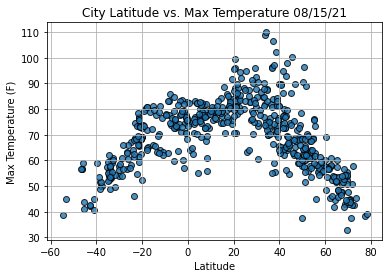

In [20]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

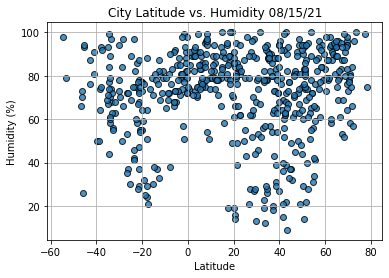

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

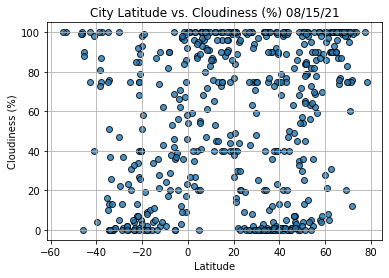

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

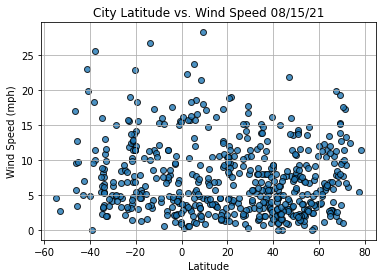

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                    Tuatapere
Country                        NZ
Date          2021-08-15 23:05:31
Lat                      -46.1333
Lng                      167.6833
Max Temp                    56.82
Humidity                       73
Cloudiness                     99
Wind Speed                   9.64
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
544     True
545     True
546    False
547     True
548    False
Name: Lat, Length: 549, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lompoc,US,2021-08-15 23:05:28,34.6391,-120.4579,87.78,78,1,13.80
2,Butaritari,KI,2021-08-15 23:05:28,3.0707,172.7902,83.32,73,27,10.25
3,Ulaanbaatar,MN,2021-08-15 23:03:01,47.9077,106.8832,59.13,72,0,2.24
4,Tasiilaq,GL,2021-08-15 23:05:29,65.6145,-37.6368,48.36,69,87,2.89
5,Mehran,IR,2021-08-15 23:05:29,33.1222,46.1646,89.98,19,0,11.54
...,...,...,...,...,...,...,...,...,...
539,Mbandaka,CD,2021-08-15 23:08:57,0.0487,18.2603,73.31,75,54,3.65
543,Temirtau,KZ,2021-08-15 23:08:59,50.0544,72.9483,37.65,64,57,2.13
544,Teeli,RU,2021-08-15 23:08:59,51.0333,90.2333,51.69,83,78,1.88
545,West Fargo,US,2021-08-15 23:08:59,46.8750,-96.9004,89.60,45,1,21.85


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lompoc,US,2021-08-15 23:05:28,34.6391,-120.4579,87.78,78,1,13.80
2,Butaritari,KI,2021-08-15 23:05:28,3.0707,172.7902,83.32,73,27,10.25
3,Ulaanbaatar,MN,2021-08-15 23:03:01,47.9077,106.8832,59.13,72,0,2.24
4,Tasiilaq,GL,2021-08-15 23:05:29,65.6145,-37.6368,48.36,69,87,2.89
5,Mehran,IR,2021-08-15 23:05:29,33.1222,46.1646,89.98,19,0,11.54
...,...,...,...,...,...,...,...,...,...
539,Mbandaka,CD,2021-08-15 23:08:57,0.0487,18.2603,73.31,75,54,3.65
543,Temirtau,KZ,2021-08-15 23:08:59,50.0544,72.9483,37.65,64,57,2.13
544,Teeli,RU,2021-08-15 23:08:59,51.0333,90.2333,51.69,83,78,1.88
545,West Fargo,US,2021-08-15 23:08:59,46.8750,-96.9004,89.60,45,1,21.85


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]







In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
New
6:57
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: illegal target for annotation (<ipython-input-30-586aee058864>, line 5)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))



In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))